In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import timeit
import seaborn as sns
from pylab import rcParams

pd.set_option('display.max_columns', 500) # to display all the columns
sns.set(style='darkgrid', palette='dark', font_scale=2)
rcParams['figure.figsize'] = 10, 6

In [81]:
# to display plots inline

%matplotlib inline 

In [82]:
#Importing data

try:
    df = pd.read_csv('data.csv')
except Exception as e:
    print(e)
    gc.collect()

In [83]:
#Lookigng into the data
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [84]:
# Checking the dataframe shape
df.shape

(569, 33)

In [85]:
#Function to find % of missing values in df 
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns 

In [86]:
missing_values_table(df)

,Missing Values,% of Total Values
id,0,0.0
diagnosis,0,0.0
radius_mean,0,0.0
texture_mean,0,0.0
perimeter_mean,0,0.0
area_mean,0,0.0
smoothness_mean,0,0.0
compactness_mean,0,0.0
concavity_mean,0,0.0
concave points_mean,0,0.0


In [87]:
# We can see only one column has missing values
# dropping the Unnamed: 32 column(only filled with missing values)  and also the id column from df
columns = ['id', 'Unnamed: 32']
df.drop(columns, inplace=True, axis=1)

In [88]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


B    357
M    212
Name: diagnosis, dtype: int64


Text(0.5,1,'Target Value Counts')

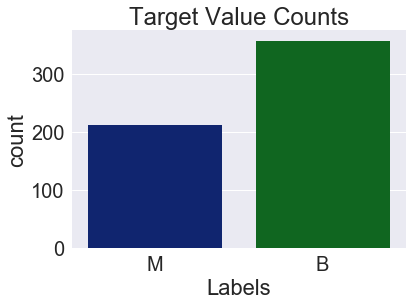

In [89]:
print(df.diagnosis.value_counts())
sns.countplot(df['diagnosis'])
plt.xlabel('Labels')
plt.title('Target Value Counts')

In [90]:
# Separating Target Variable
y = df.pop('diagnosis')
X = df

In [91]:
#Looking into the shape of features & target
y.shape , X.shape

((569,), (569, 30))

In [92]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
rfc = RandomForestClassifier(n_estimators=200, n_jobs=-1, class_weight='balanced', max_depth=6)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)
boruta_selector.fit(X.values, y.values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	21
Tentative: 	9
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	21
Tentative: 	9
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	21
Tentative: 	8
Rejected: 	1


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	11 / 100
Confirmed: 	21
Tentative: 	8
Rejected: 	1


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	12 / 100
Confirmed: 	23
Tentative: 	6
Rejected: 	1


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	13 / 100
Confirmed: 	23
Tentative: 	6
Rejected: 	1


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	14 / 100
Confirmed: 	23
Tentative: 	6
Rejected: 	1


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	15 / 100
Confirmed: 	23
Tentative: 	6
Rejected: 	1


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	16 / 100
Confirmed: 	23
Tentative: 	6
Rejected: 	1


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	17 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	18 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	19 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	20 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	21 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	22 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	23 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	24 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	25 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	26 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	27 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	28 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	29 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	30 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	31 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	32 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	33 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	34 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	35 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	36 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	37 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	38 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	39 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	40 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	41 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	42 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	43 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	44 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	45 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	46 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	47 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	48 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	49 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	50 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	51 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	52 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	53 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	54 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	55 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	56 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	57 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	58 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	59 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	60 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	61 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	62 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	63 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	64 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	65 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	66 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	67 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	68 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	69 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	70 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	71 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	72 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	73 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	74 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	75 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	76 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	77 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	78 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	79 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	80 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	81 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	82 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	83 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	84 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	85 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	86 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	87 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	88 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	89 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	90 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	91 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	92 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	93 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	94 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	95 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	96 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	97 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


Iteration: 	98 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2
Iteration: 	99 / 100
Confirmed: 	23
Tentative: 	5
Rejected: 	2


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	23
Tentative: 	3
Rejected: 	2


C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\boruta-0.1.5-py3.5.egg\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater


BorutaPy(alpha=0.05,
     estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=124, n_jobs=-1, oob_score=False,
            random_state=<mtrand.RandomState object at 0x00000000056A9318>,
            verbose=0, warm_start=False),
     max_iter=100, n_estimators='auto', perc=100,
     random_state=<mtrand.RandomState object at 0x00000000056A9318>,
     two_step=True, verbose=2)

In [93]:
# Encoding the Dependent Variable

from sklearn.preprocessing import LabelEncoder

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

### From the above shown analysis we can see that there is class imbalance problem in the data , below using SMOTE we are solving the class imbalance problem.

In [94]:
#Minority Resampling - SMOTE

from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
sm = SMOTE()
X , y = sm.fit_sample(X, y)
print('Resampled dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({0: 357, 1: 212})
Resampled dataset shape Counter({0: 357, 1: 357})


In [95]:
X = pd.DataFrame(X)

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [97]:
#Looking into the shape of features & target after split
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((571, 30), (571,), (143, 30), (143,))

In [98]:
# Importing the SVM classfier 
from sklearn.svm import SVC

In [99]:
# Function to plaot confusion matrix
def plot_conf_matrix (confusion_matrix):
    class_names = [0,1]
    fontsize=14
    df_conf_matrix = pd.DataFrame(
            confusion_matrix, index=class_names, columns=class_names, 
        )
    fig = plt.figure()
    heatmap = sns.heatmap(df_conf_matrix, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [100]:
# function to plot ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def plot_roc_curve(roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# 1. SVM with Linear Kernel 

In [101]:
start_time = timeit.default_timer()

# Creating the /linear classifier

svclassifier_linear = SVC(kernel='linear' , class_weight = 'balanced' , verbose = True)  
svclassifier_linear.fit(X_train, y_train)

svclassifier_linear_time = timeit.default_timer() - start_time

[LibSVM]

In [102]:
# Making Predictions
y_pred_linear = svclassifier_linear.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred_linear)
acc_score

0.972027972027972

In [104]:
print("Precision:",metrics.precision_score(y_test, y_pred_linear))


print("Recall:",metrics.recall_score(y_test, y_pred_linear))

Precision: 0.9866666666666667
Recall: 0.961038961038961


In [105]:
from sklearn.metrics import confusion_matrix
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear, labels=None, sample_weight=None)

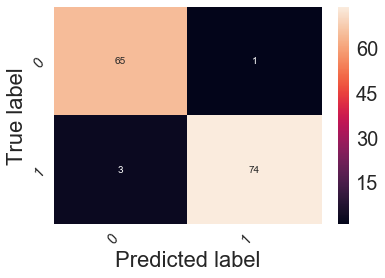

In [106]:
plot_conf_matrix(conf_matrix_linear)

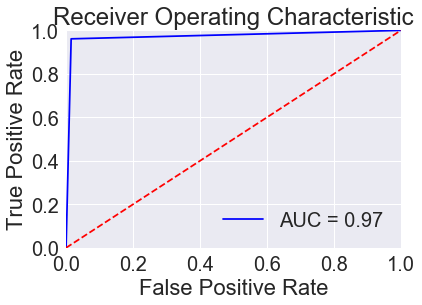

In [107]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_linear)
roc_auc = auc(fpr, tpr)
plot_roc_curve(roc_auc)

# 2. SVM with Sigmoid Kernel 

In [108]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [109]:
X_train_std = scalar.fit_transform(X_train)
X_test_std = scalar.transform(X_test)

In [110]:
start_time = timeit.default_timer()
# Creating the Sigmoid classifier

svclassifier_sigmoid = SVC(kernel='sigmoid', verbose = True )  
svclassifier_sigmoid.fit(X_train_std, y_train)

svclassifier_sigmoid_time = timeit.default_timer() - start_time

[LibSVM]

In [111]:
# Making Predictions
y_pred_sigmoid = svclassifier_sigmoid.predict(X_test_std)

In [112]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred_sigmoid)
acc_score

0.972027972027972

In [113]:
from sklearn.metrics import classification_report, confusion_matrix  
print(classification_report(y_test, y_pred_sigmoid)) 

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        66
           1       0.95      1.00      0.97        77

   micro avg       0.97      0.97      0.97       143
   macro avg       0.98      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [114]:
from sklearn.metrics import confusion_matrix
conf_matrix_sigmoid = confusion_matrix(y_test, y_pred_sigmoid, labels=None, sample_weight=None)

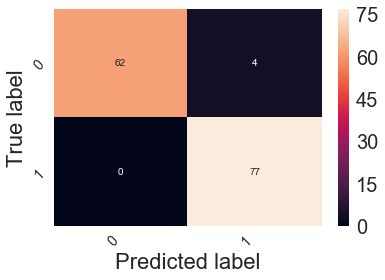

In [115]:
plot_conf_matrix(conf_matrix_sigmoid)

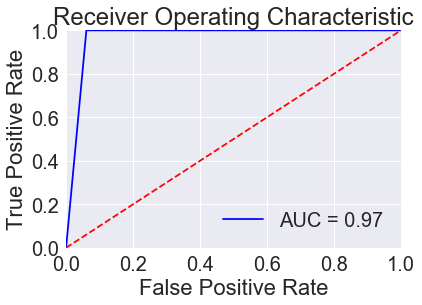

In [116]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_sigmoid)
roc_auc = auc(fpr, tpr)
plot_roc_curve(roc_auc)

# 3.  SVM with Gaussian/RBF Kernel 

In [117]:
start_time = timeit.default_timer()

# Creating the Gaussian/RBF classifier

svclassifier_rbf = SVC(kernel='rbf' , class_weight = 'balanced' ,verbose = True)  
svclassifier_rbf.fit(X_train_std, y_train)

svclassifier_rbf_time = timeit.default_timer() - start_time

[LibSVM]

In [118]:
# Making Predictions
y_pred_rbf = svclassifier_rbf.predict(X_test_std)

In [119]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred_rbf)
acc_score

0.9790209790209791

In [120]:
print(classification_report(y_test, y_pred_rbf)) 

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        66
           1       0.97      0.99      0.98        77

   micro avg       0.98      0.98      0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [121]:
from sklearn.metrics import confusion_matrix
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf, labels=None, sample_weight=None)

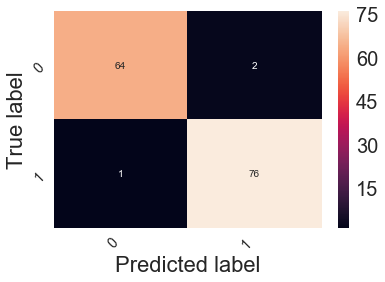

In [122]:
plot_conf_matrix(conf_matrix_rbf)

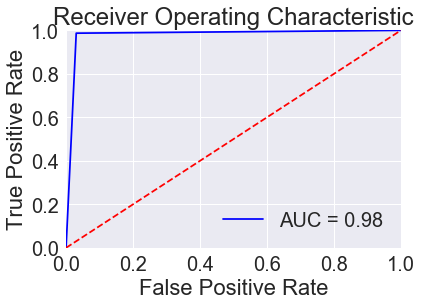

In [123]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_rbf)
roc_auc = auc(fpr, tpr)
plot_roc_curve(roc_auc)

# 4. SVM with Poly Kernel 

In [124]:
start_time = timeit.default_timer()

# Creating the Sigmoid classifier

svclassifier_poly = SVC(kernel='poly',verbose = True)  
svclassifier_poly.fit(X_train_std, y_train)

svclassifier_poly_time = timeit.default_timer() - start_time

[LibSVM]

In [125]:
# Making Predictions
y_pred_poly = svclassifier_poly.predict(X_test_std)

In [126]:
#from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred_poly)
acc_score

0.972027972027972

In [127]:
print("Precision:",metrics.precision_score(y_test, y_pred_poly))


print("Recall:",metrics.recall_score(y_test, y_pred_poly))

Precision: 0.9620253164556962
Recall: 0.987012987012987


In [128]:
from sklearn.metrics import confusion_matrix
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly, labels=None, sample_weight=None)

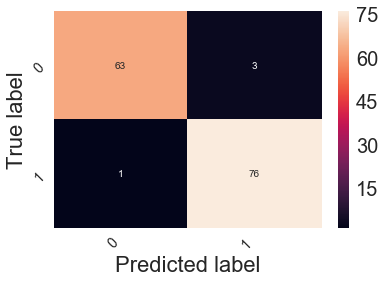

In [129]:
plot_conf_matrix(conf_matrix_poly)

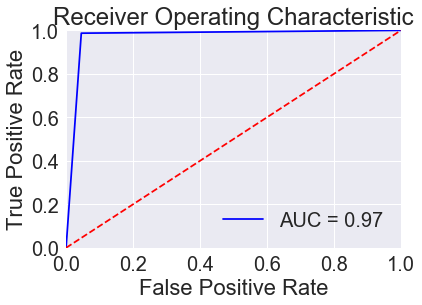

In [130]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_poly)
roc_auc = auc(fpr, tpr)
plot_roc_curve(roc_auc)

# 5. ANOVA

In [131]:
from sklearn import svm
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# ANOVA SVM-C
# anova filter, take 3 best ranked features
anova_filter = SelectKBest(f_regression, k=3)

start_time = timeit.default_timer()

clf = svm.SVC(kernel='linear')

anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)

anova_svm_time = timeit.default_timer() - start_time

y_pred = anova_svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        66
           1       0.96      0.96      0.96        77

   micro avg       0.96      0.96      0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [132]:
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.958041958041958

In [133]:
print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.961038961038961
Recall: 0.961038961038961


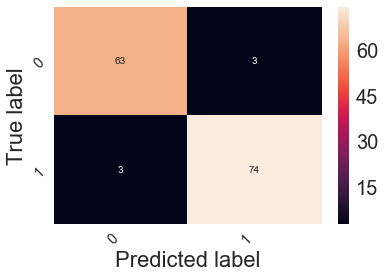

In [134]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)

plot_conf_matrix(conf_matrix)

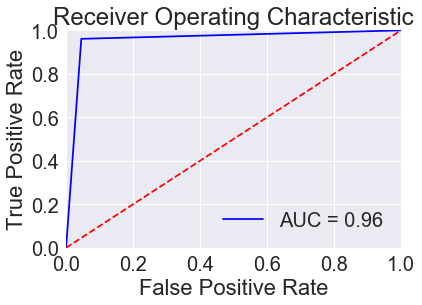

In [135]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plot_roc_curve(roc_auc)

# 6. Laplacian Kernel

In [136]:
from sklearn.metrics.pairwise import laplacian_kernel
def l_kernel(X, y):
    return laplacian_kernel(X, y)

In [137]:
start_time = timeit.default_timer()

clf_l_kernel = svm.SVC(kernel=l_kernel)
clf_l_kernel.fit(X_train_std, y_train)

clf_l_kernel_time = timeit.default_timer() - start_time

y_pred_l_kernel = clf_l_kernel.predict(X_test_std)

In [138]:
y_pred_l_kernel = clf_l_kernel.predict(X_test_std)

In [139]:
acc_score = accuracy_score(y_test, y_pred_l_kernel)
acc_score

0.986013986013986

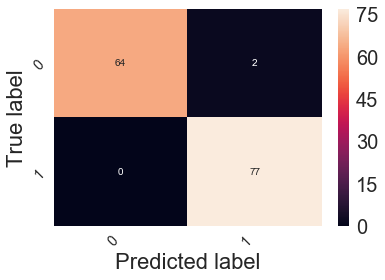

In [140]:
from sklearn.metrics import confusion_matrix
conf_matrix_l_kernel = confusion_matrix(y_test, y_pred_l_kernel, labels=None, sample_weight=None)

plot_conf_matrix(conf_matrix_l_kernel)

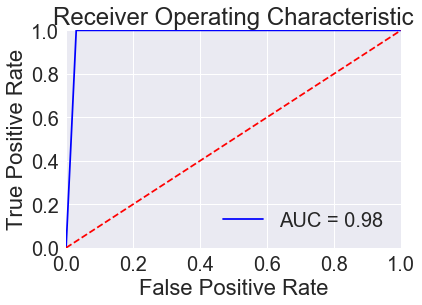

In [141]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_l_kernel)
roc_auc = auc(fpr, tpr)
plot_roc_curve(roc_auc)

In [142]:
print("Precision:",metrics.precision_score(y_test, y_pred_l_kernel))


print("Recall:",metrics.recall_score(y_test, y_pred_l_kernel))

Precision: 0.9746835443037974
Recall: 1.0


# 1. nu-SVMs - Linear 

In [143]:
from sklearn.svm import NuSVC

In [144]:
start_time = timeit.default_timer()

# Creating the linear classifier

svclassifier_linear = NuSVC(nu= 0.2 , kernel='linear' , class_weight = 'balanced' , verbose = True)  
svclassifier_linear.fit(X_train, y_train)

nu_svclassifier_linear_time = timeit.default_timer() - start_time

[LibSVM]

In [145]:
# Making Predictions
y_pred_linear = svclassifier_linear.predict(X_test)

In [146]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred_linear)
acc_score

0.951048951048951

In [147]:
print("Precision:",metrics.precision_score(y_test, y_pred_linear))


print("Recall:",metrics.recall_score(y_test, y_pred_linear))

Precision: 0.972972972972973
Recall: 0.935064935064935


In [148]:
from sklearn.metrics import confusion_matrix
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear, labels=None, sample_weight=None)

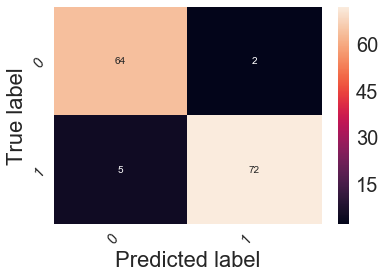

In [149]:
plot_conf_matrix(conf_matrix_linear)

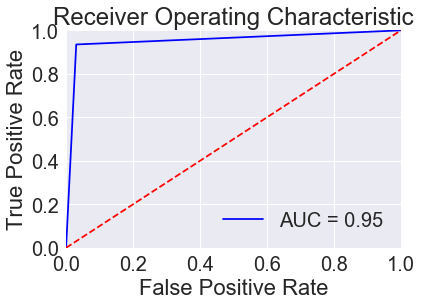

In [150]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_linear)
roc_auc = auc(fpr, tpr)
plot_roc_curve(roc_auc)

# 2. nu-SVM with Sigmoid Kernel 

In [151]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [152]:
X_train_std = scalar.fit_transform(X_train)
X_test_std = scalar.transform(X_test)

In [153]:
start_time = timeit.default_timer()

# Creating the Sigmoid classifier

svclassifier_sigmoid = NuSVC(nu= 0.2 , kernel='sigmoid', verbose = True )  
svclassifier_sigmoid.fit(X_train_std, y_train)

nu_svclassifier_sigmoid_time = timeit.default_timer() - start_time

[LibSVM]

In [154]:
# Making Predictions
y_pred_sigmoid = svclassifier_sigmoid.predict(X_test_std)

In [155]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred_sigmoid)
acc_score

0.9790209790209791

In [156]:
from sklearn.metrics import classification_report, confusion_matrix  
print(classification_report(y_test, y_pred_sigmoid)) 

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        66
           1       0.97      0.99      0.98        77

   micro avg       0.98      0.98      0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [157]:
from sklearn.metrics import confusion_matrix
conf_matrix_sigmoid = confusion_matrix(y_test, y_pred_sigmoid, labels=None, sample_weight=None)

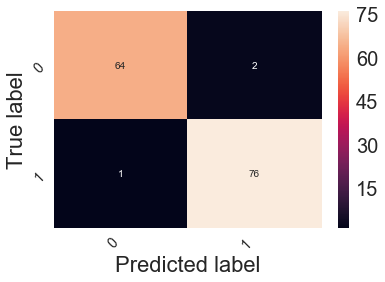

In [158]:
plot_conf_matrix(conf_matrix_sigmoid)

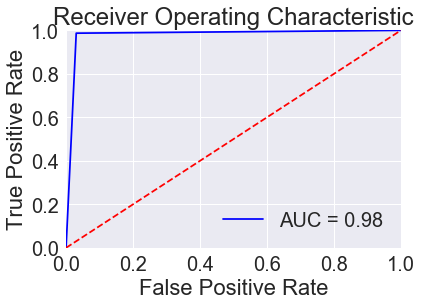

In [159]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_sigmoid)
roc_auc = auc(fpr, tpr)
plot_roc_curve(roc_auc)

# 3.  nu-SVM with Gaussian/RBF Kernel 

In [160]:
start_time = timeit.default_timer()

# Creating the Gaussian/RBF classifier

svclassifier_rbf = NuSVC(nu= 0.2 , kernel='rbf' , class_weight = 'balanced' ,verbose = True)  
svclassifier_rbf.fit(X_train_std, y_train)

nu_svclassifier_rbf_time = timeit.default_timer() - start_time

[LibSVM]

In [161]:
# Making Predictions
y_pred_rbf = svclassifier_rbf.predict(X_test_std)

In [162]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred_rbf)
acc_score

0.9790209790209791

In [163]:
print(classification_report(y_test, y_pred_rbf)) 

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        66
           1       0.97      0.99      0.98        77

   micro avg       0.98      0.98      0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [164]:
from sklearn.metrics import confusion_matrix
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf, labels=None, sample_weight=None)

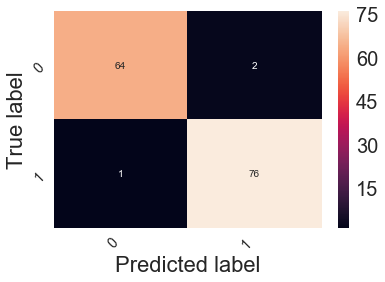

In [165]:
plot_conf_matrix(conf_matrix_rbf)

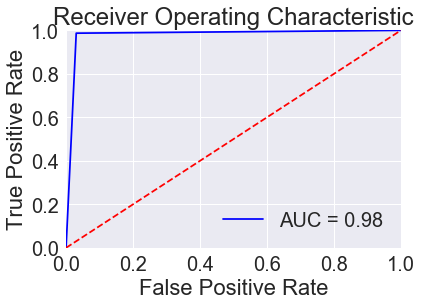

In [166]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_rbf)
roc_auc = auc(fpr, tpr)
plot_roc_curve(roc_auc)

# 4. nu-SVM with Poly Kernel 

In [167]:
start_time = timeit.default_timer()

# Creating the Sigmoid classifier

svclassifier_poly = NuSVC(nu= 0.2 , kernel='poly',verbose = True)  
svclassifier_poly.fit(X_train_std, y_train)

nu_svclassifier_poly_time = timeit.default_timer() - start_time

[LibSVM]

In [168]:
# Making Predictions
y_pred_poly = svclassifier_poly.predict(X_test_std)

In [169]:
#from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred_poly)
acc_score

0.9790209790209791

In [170]:
print("Precision:",metrics.precision_score(y_test, y_pred_poly))


print("Recall:",metrics.recall_score(y_test, y_pred_poly))

Precision: 0.9743589743589743
Recall: 0.987012987012987


In [171]:
from sklearn.metrics import confusion_matrix
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly, labels=None, sample_weight=None)

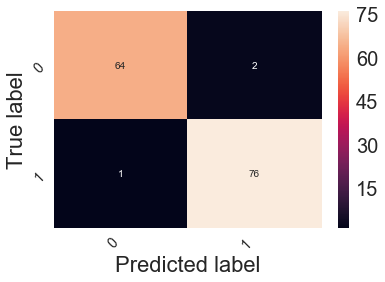

In [172]:
plot_conf_matrix(conf_matrix_poly)

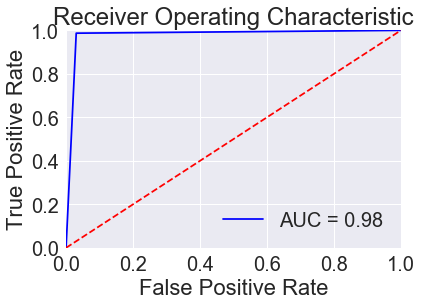

In [173]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_poly)
roc_auc = auc(fpr, tpr)
plot_roc_curve(roc_auc)

In [174]:
print("Precision:",metrics.precision_score(y_test, y_pred_poly))


print("Recall:",metrics.recall_score(y_test, y_pred_poly))

Precision: 0.9743589743589743
Recall: 0.987012987012987


# 5. nu-ANOVA

In [175]:
from sklearn import svm 
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# ANOVA SVM-C
# anova filter, take 3 best ranked features

start_time = timeit.default_timer()

anova_filter = SelectKBest(f_regression, k=3)

clf = NuSVC(nu= 0.2 , kernel='linear')

anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)

nu_svclassifier_poly_time = timeit.default_timer() - start_time

y_pred = anova_svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        66
           1       0.96      0.99      0.97        77

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [176]:
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.972027972027972

In [177]:
print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9620253164556962
Recall: 0.987012987012987


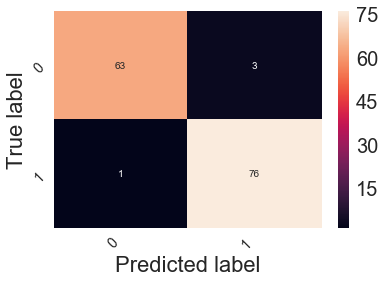

In [178]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)

plot_conf_matrix(conf_matrix)

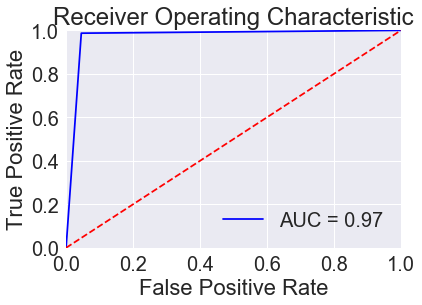

In [179]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plot_roc_curve(roc_auc)

# 6. nu-Laplacian Kernel

In [180]:
from sklearn.metrics.pairwise import laplacian_kernel
def l_kernel(X, y):
    return laplacian_kernel(X, y)

In [181]:
start_time = timeit.default_timer()

clf_l_kernel = NuSVC(nu= 0.2 ,  kernel=l_kernel)
clf_l_kernel.fit(X_train_std, y_train)

nu_svclassifier_laplacian_time = timeit.default_timer() - start_time

y_pred_l_kernel = clf_l_kernel.predict(X_test_std)

In [182]:
y_pred_l_kernel = clf_l_kernel.predict(X_test_std)

In [183]:
acc_score = accuracy_score(y_test, y_pred_l_kernel)
acc_score

0.9790209790209791

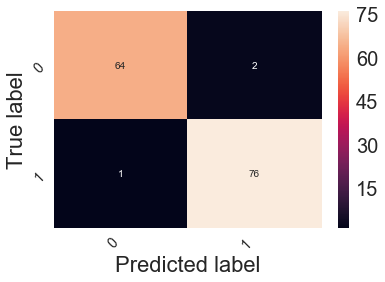

In [184]:
from sklearn.metrics import confusion_matrix
conf_matrix_poly = confusion_matrix(y_test, y_pred_l_kernel, labels=None, sample_weight=None)

plot_conf_matrix(conf_matrix_poly)

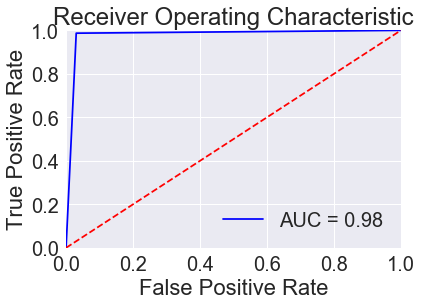

In [185]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_l_kernel)
roc_auc = auc(fpr, tpr)
plot_roc_curve(roc_auc)

In [186]:
print("Precision:",metrics.precision_score(y_test, y_pred_l_kernel))


print("Recall:",metrics.recall_score(y_test, y_pred_l_kernel))

Precision: 0.9743589743589743
Recall: 0.987012987012987


# 1. c-SVMs - Linear 

In [187]:
start_time = timeit.default_timer()

# Creating the linear classifier

svclassifier_linear = SVC(kernel='linear' , C=1.0 , class_weight = 'balanced' , verbose = True)  
svclassifier_linear.fit(X_train, y_train)

c_svclassifier_linear_time = timeit.default_timer() - start_time

[LibSVM]

In [188]:
# Making Predictions
y_pred_linear = svclassifier_linear.predict(X_test)

In [189]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred_linear)
acc_score

0.972027972027972

In [190]:
print("Precision:",metrics.precision_score(y_test, y_pred_linear))


print("Recall:",metrics.recall_score(y_test, y_pred_linear))

Precision: 0.9866666666666667
Recall: 0.961038961038961


In [191]:
from sklearn.metrics import confusion_matrix
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear, labels=None, sample_weight=None)

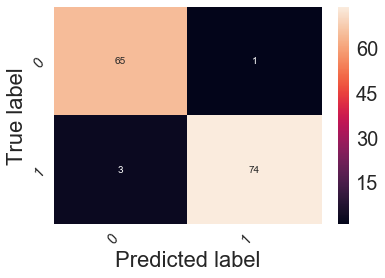

In [192]:
plot_conf_matrix(conf_matrix_linear)

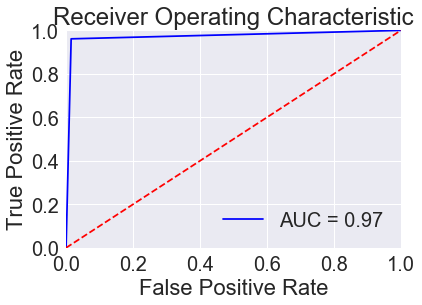

In [193]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_linear)
roc_auc = auc(fpr, tpr)
plot_roc_curve(roc_auc)

# 2. c-SVM with Sigmoid Kernel 

In [194]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [195]:
X_train_std = scalar.fit_transform(X_train)
X_test_std = scalar.transform(X_test)

In [196]:
start_time = timeit.default_timer()

# Creating the Sigmoid classifier

svclassifier_sigmoid = SVC(C = 1.0 , kernel='sigmoid', verbose = True )  
svclassifier_sigmoid.fit(X_train_std, y_train)

c_svclassifier_sigmoid_time = timeit.default_timer() - start_time

[LibSVM]

In [197]:
# Making Predictions
y_pred_sigmoid = svclassifier_sigmoid.predict(X_test_std)

In [198]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred_sigmoid)
acc_score

0.972027972027972

In [199]:
from sklearn.metrics import classification_report, confusion_matrix  
print(classification_report(y_test, y_pred_sigmoid)) 

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        66
           1       0.95      1.00      0.97        77

   micro avg       0.97      0.97      0.97       143
   macro avg       0.98      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [200]:
from sklearn.metrics import confusion_matrix
conf_matrix_sigmoid = confusion_matrix(y_test, y_pred_sigmoid, labels=None, sample_weight=None)

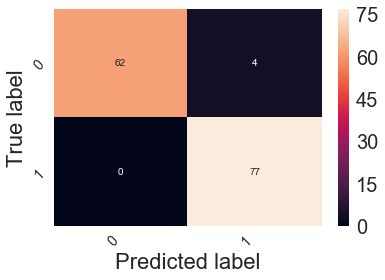

In [201]:
plot_conf_matrix(conf_matrix_sigmoid)

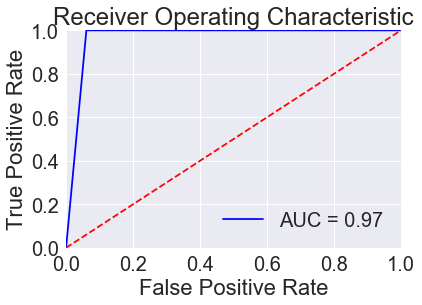

In [202]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_sigmoid)
roc_auc = auc(fpr, tpr)
plot_roc_curve(roc_auc)

# 3.  c-SVM with Gaussian/RBF Kernel 

In [203]:
start_time = timeit.default_timer()

# Creating the Gaussian/RBF classifier

svclassifier_rbf = SVC(C = 1.0 , kernel='rbf' , class_weight = 'balanced' ,verbose = True)  
svclassifier_rbf.fit(X_train_std, y_train)

c_svclassifier_rbf_time = timeit.default_timer() - start_time

[LibSVM]

In [204]:
# Making Predictions
y_pred_rbf = svclassifier_rbf.predict(X_test_std)

In [205]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred_rbf)
acc_score

0.9790209790209791

In [206]:
print(classification_report(y_test, y_pred_rbf)) 

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        66
           1       0.97      0.99      0.98        77

   micro avg       0.98      0.98      0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [207]:
from sklearn.metrics import confusion_matrix
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf, labels=None, sample_weight=None)

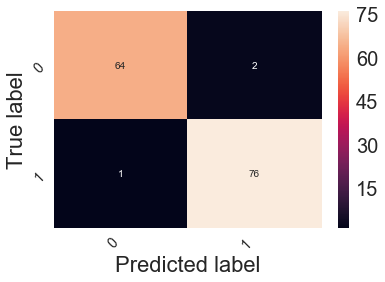

In [208]:
plot_conf_matrix(conf_matrix_rbf)

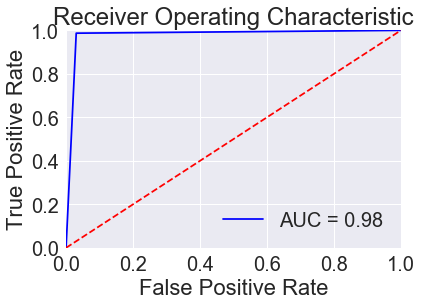

In [209]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_rbf)
roc_auc = auc(fpr, tpr)
plot_roc_curve(roc_auc)

# 4. c-SVM with Poly Kernel 

In [210]:
start_time = timeit.default_timer()

# Creating the Sigmoid classifier

svclassifier_poly = SVC(C= 1.0 , kernel='poly',verbose = True)  
svclassifier_poly.fit(X_train_std, y_train)

c_svclassifier_poly_time = timeit.default_timer() - start_time

[LibSVM]

In [211]:
# Making Predictions
y_pred_poly = svclassifier_poly.predict(X_test_std)

In [212]:
#from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred_poly)
acc_score

0.972027972027972

In [213]:
print("Precision:",metrics.precision_score(y_test, y_pred_poly))


print("Recall:",metrics.recall_score(y_test, y_pred_poly))

Precision: 0.9620253164556962
Recall: 0.987012987012987


In [214]:
from sklearn.metrics import confusion_matrix
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly, labels=None, sample_weight=None)

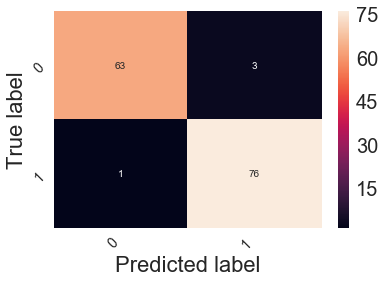

In [215]:
plot_conf_matrix(conf_matrix_poly)

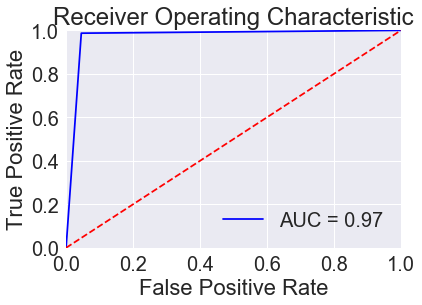

In [216]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_poly)
roc_auc = auc(fpr, tpr)
plot_roc_curve(roc_auc)

# 5. c-ANOVA

In [217]:
from sklearn import svm 
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# ANOVA SVM-C
# anova filter, take 3 best ranked features
start_time = timeit.default_timer()

anova_filter = SelectKBest(f_regression, k=3)

clf = SVC(C = 1.0 , kernel='linear')

anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)

c_svclassifier_annova_time = timeit.default_timer() - start_time

y_pred = anova_svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        66
           1       0.96      0.96      0.96        77

   micro avg       0.96      0.96      0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [218]:
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.958041958041958

In [219]:
print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.961038961038961
Recall: 0.961038961038961


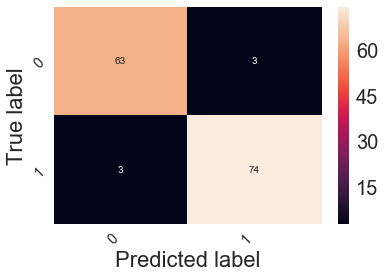

In [220]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)

plot_conf_matrix(conf_matrix)

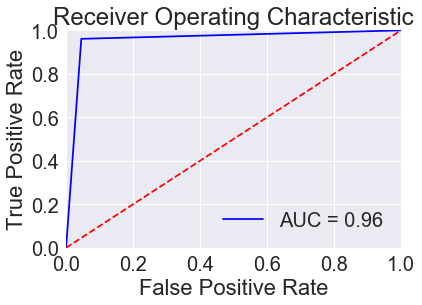

In [221]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plot_roc_curve(roc_auc)

# 6. c-Laplacian Kernel

In [222]:
from sklearn.metrics.pairwise import laplacian_kernel
def l_kernel(X, y):
    return laplacian_kernel(X, y)

In [223]:
start_time = timeit.default_timer()

clf_l_kernel = SVC(C = 1.0 ,  kernel=l_kernel)
clf_l_kernel.fit(X_train_std, y_train)

c_svclassifier_laplacian_time = timeit.default_timer() - start_time

y_pred_l_kernel = clf_l_kernel.predict(X_test_std)

In [224]:
y_pred_l_kernel = clf_l_kernel.predict(X_test_std)

In [225]:
acc_score = accuracy_score(y_test, y_pred_l_kernel)
acc_score

0.986013986013986

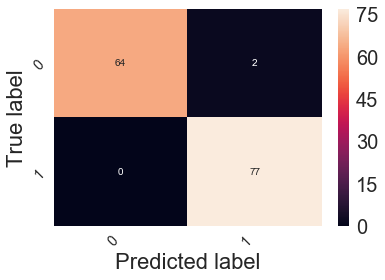

In [226]:
from sklearn.metrics import confusion_matrix
conf_matrix_poly = confusion_matrix(y_test, y_pred_l_kernel, labels=None, sample_weight=None)

plot_conf_matrix(conf_matrix_poly)

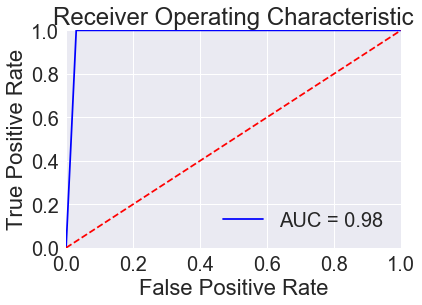

In [227]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_l_kernel)
roc_auc = auc(fpr, tpr)
plot_roc_curve(roc_auc)

In [228]:
print("Precision:",metrics.precision_score(y_test, y_pred_l_kernel))


print("Recall:",metrics.recall_score(y_test, y_pred_l_kernel))

Precision: 0.9746835443037974
Recall: 1.0


# Feature Selection with Boruta Method

In [229]:
selected = X_train.columns[boruta_selector.support_]
X_train = X_train[selected]
X_test = X_test[selected]

In [230]:
# Selected columns after feature reduction
selected

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7, 10, 12, 13, 16, 17, 20, 21, 22, 23,
            24, 25, 26, 27, 28, 29],
           dtype='int64')

In [231]:
X_train.shape# we can see a reduction of 3 features 

(571, 23)

## Now checking Performence After Feature Selection

In [232]:
start_time = timeit.default_timer()


# Creating the linear classifier

svclassifier_linear = SVC(kernel='linear' , class_weight = 'balanced' , verbose = True)  
svclassifier_linear.fit(X_train, y_train)

svclassifier_featureselection_time = timeit.default_timer() - start_time

[LibSVM]

In [233]:
# Making Predictions
y_pred_linear = svclassifier_linear.predict(X_test)

In [234]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred_linear)
acc_score

0.9790209790209791

There is an improve of accuracy with feature selection

In [235]:
print("Precision:",metrics.precision_score(y_test, y_pred_linear))


print("Recall:",metrics.recall_score(y_test, y_pred_linear))

Precision: 0.9868421052631579
Recall: 0.974025974025974


Also no such improvment for Precision and Recall with feature selection

In [236]:
from sklearn.metrics import confusion_matrix
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear, labels=None, sample_weight=None)

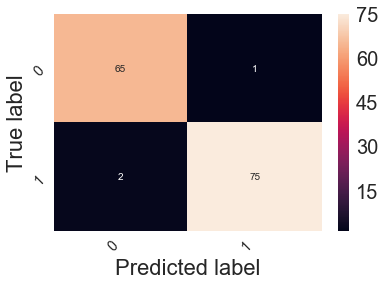

In [237]:
plot_conf_matrix(conf_matrix_linear)

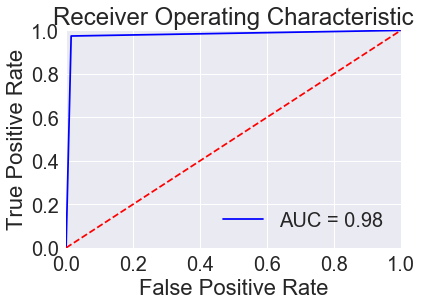

In [238]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_linear)
roc_auc = auc(fpr, tpr)
plot_roc_curve(roc_auc)

## Analysis of time taken by different SVM Classifier Types

# Adaboost classifier with Decision Tree

In [239]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

start_time = timeit.default_timer()
clf_ad = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state=1)
clf_ad.fit(X_train_std,y_train)

bosting_classifier_time = timeit.default_timer() - start_time

In [240]:
# Making Predictions
boosting_pred = clf_ad.predict(X_test_std)

In [241]:
#from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, boosting_pred)
acc_score

0.986013986013986

In [242]:
print("Precision:",metrics.precision_score(y_test, boosting_pred))


print("Recall:",metrics.recall_score(y_test, boosting_pred))

Precision: 0.9746835443037974
Recall: 1.0


In [243]:
from sklearn.metrics import confusion_matrix
conf_matrix_boosting = confusion_matrix(y_test, boosting_pred, labels=None, sample_weight=None)

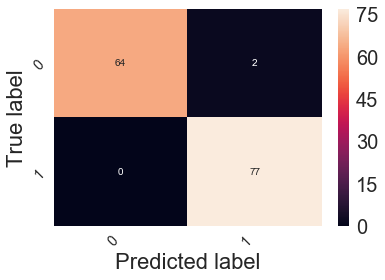

In [244]:
plot_conf_matrix(conf_matrix_boosting)

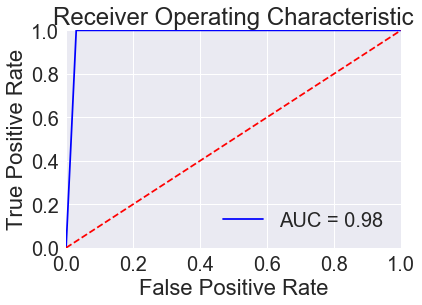

In [245]:
fpr, tpr, threshold = roc_curve(y_test, boosting_pred)
roc_auc = auc(fpr, tpr)
plot_roc_curve(roc_auc)

## Time taken by different classifiers with details 

In [246]:
# Creating Dict to capture the time taken by different classifiers 

time = dict( (name,eval(name)) for name in ['c_svclassifier_annova_time','c_svclassifier_laplacian_time','c_svclassifier_linear_time',
'c_svclassifier_poly_time','c_svclassifier_rbf_time','c_svclassifier_sigmoid_time','clf_l_kernel_time',
'svclassifier_featureselection_time','svclassifier_linear_time','svclassifier_poly_time','svclassifier_rbf_time','svclassifier_sigmoid_time',
'nu_svclassifier_laplacian_time','nu_svclassifier_linear_time','nu_svclassifier_poly_time','nu_svclassifier_rbf_time',
 'nu_svclassifier_sigmoid_time','bosting_classifier_time'] )

In [247]:
# Sorting the list and displaying the time taken in sorted order

sorted(time.items(), key=lambda x: x[1])

[('svclassifier_sigmoid_time', 0.006431631008581462),
 ('svclassifier_poly_time', 0.006975988656449772),
 ('svclassifier_rbf_time', 0.008029966118556331),
 ('c_svclassifier_sigmoid_time', 0.00826878872726411),
 ('nu_svclassifier_linear_time', 0.0088478842094446),
 ('c_svclassifier_rbf_time', 0.00998475877531746),
 ('nu_svclassifier_sigmoid_time', 0.010109499179179693),
 ('nu_svclassifier_rbf_time', 0.010995313945159069),
 ('c_svclassifier_poly_time', 0.011552303532880615),
 ('nu_svclassifier_poly_time', 0.017770375812006023),
 ('c_svclassifier_laplacian_time', 0.019732668682763688),
 ('nu_svclassifier_laplacian_time', 0.021683908606519253),
 ('c_svclassifier_annova_time', 0.023552646174266556),
 ('clf_l_kernel_time', 0.026257854994128138),
 ('svclassifier_linear_time', 1.2143178298642852),
 ('c_svclassifier_linear_time', 1.7868644407346892),
 ('bosting_classifier_time', 2.4532268881887376),
 ('svclassifier_featureselection_time', 2.8462621893283995)]

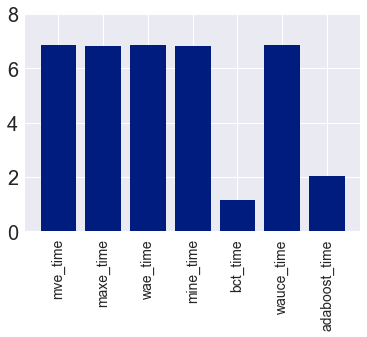

In [316]:
#Visualizing the dataset of time consumed 

names = list(time.keys())
values = list(time.values())

plt.bar(range(len(time)),values,tick_label=names)
plt.xticks(fontsize=14, rotation=90)
plt.ylim(0, 8)
plt.show()

# Ensemble Methods

In [249]:
svVclassifier_linear = NuSVC(nu= 0.2, kernel='linear' , class_weight = 'balanced', probability=True)  
svVclassifier_sigmoid = NuSVC(nu= 0.2, kernel='sigmoid', probability=True)  
svVclassifier_rbf = NuSVC(nu= 0.2, kernel='rbf', class_weight = 'balanced', probability=True)
svVclassifier_poly = NuSVC(nu= 0.2, kernel='poly', probability=True)

anova_filter = SelectKBest(f_regression, k=3)
clf = NuSVC(nu= 0.2 , kernel='linear', probability=True)
svVclassifier_anova = make_pipeline(anova_filter, clf)

svVclassifier_laplace = NuSVC(nu= 0.2, kernel=l_kernel, probability=True)

In [250]:
svclassifier_linear = SVC(kernel='linear' , C=1.0 , class_weight = 'balanced', probability=True)  
svclassifier_sigmoid = SVC(C = 1.0 , kernel='sigmoid', probability=True)  
svclassifier_rbf = SVC(C = 1.0 , kernel='rbf' , class_weight = 'balanced', probability=True)  
svclassifier_poly = SVC(C= 1.0 , kernel='poly', probability=True) 

anova_filter = SelectKBest(f_regression, k=3)
clf = SVC(C = 1.0 , kernel='linear', probability=True)
svclassifier_anova = make_pipeline(anova_filter, clf)

svclassifier_laplace = SVC(C = 1.0 ,  kernel=l_kernel, probability=True)

In [251]:
algorithms = [svVclassifier_linear,svVclassifier_sigmoid,svVclassifier_rbf,svVclassifier_poly,svVclassifier_anova,
              svVclassifier_laplace,svclassifier_linear,svclassifier_sigmoid,svclassifier_rbf,svclassifier_poly,
              svclassifier_anova,svclassifier_laplace]

In [252]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
predictions_prob = np.matlib.zeros((len(y_test), len(algorithms)))
predictions = np.matlib.zeros((len(y_test), len(algorithms)))
training_acc = []
roc_score = []

In [253]:
start_time = timeit.default_timer()
for i,algorithm in enumerate(algorithms):
    clf = algorithm.fit(X_train_std, y_train)
    predictions[:,i] = clf.predict(X_test_std).reshape(X_test_std.shape[0],1)
    predictions_prob[:,i] = clf.predict_proba(X_test_std)[:,1].reshape(X_test_std.shape[0],1)
    #training_acc.append(clf.score(X_train_std,y_train))
    #roc_score.append(roc_auc_score(clf.predict(X_train_std),y_train))
    acc = cross_val_score(clf, X_train_std, y_train, scoring='accuracy', cv=10)
    training_acc.append(acc.mean())
    roc = cross_val_score(clf, X_train_std, y_train, scoring='roc_auc', cv=10)
    roc_score.append(roc.mean())
training_time = timeit.default_timer() - start_time

C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid th

In [254]:
method_ensemble = []
acc_ensemble = []
roc_ensemble = []
f1_ensemble = []

# MaxE

In [255]:
start_time = timeit.default_timer()
final_predictions = []
for row_number in range(len(predictions_prob)):
    final_predictions.append(np.max(predictions_prob[row_number, ]))

preds = []
THRESHOLD = 0.7
for i in final_predictions:
    if i > THRESHOLD:
        preds.append(1)
    else:
        preds.append(0)
        
maxe_time = training_time + (timeit.default_timer() - start_time)

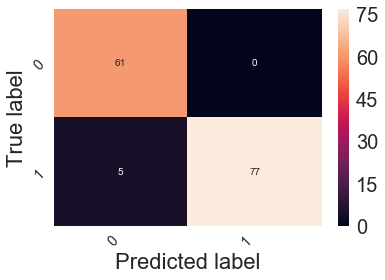

In [256]:
plot_conf_matrix(confusion_matrix(preds,y_test))

In [257]:
method_ensemble.append('MaxE')

In [258]:
acc_ensemble.append(accuracy_score(preds,y_test))

In [259]:
roc_ensemble.append(roc_auc_score(preds,y_test))

In [260]:
f1_ensemble.append(f1_score(preds,y_test))

# MinE

In [261]:
start_time = timeit.default_timer()

final_predictions = []
for row_number in range(len(predictions_prob)):
    final_predictions.append(np.min(predictions_prob[row_number, ]))

preds = []
THRESHOLD = 0.7
for i in final_predictions:
    if i > THRESHOLD:
        preds.append(1)
    else:
        preds.append(0)   
        
mine_time = training_time + (timeit.default_timer() - start_time)

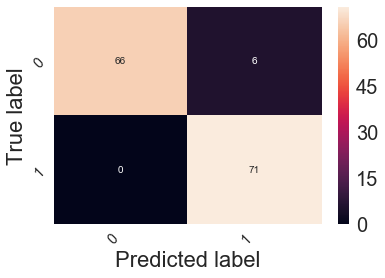

In [262]:
plot_conf_matrix(confusion_matrix(preds,y_test))

In [263]:
method_ensemble.append('MinE')

In [264]:
acc_ensemble.append(accuracy_score(preds,y_test))

In [265]:
roc_ensemble.append(roc_auc_score(preds,y_test))

In [266]:
f1_ensemble.append(f1_score(preds,y_test))

# Majority Voting Ensemble (MVE)

In [267]:
start_time = timeit.default_timer()
preds = []
for row_number in range(len(predictions)):
    (values,counts) = np.unique(np.array(predictions[row_number, ]),return_counts=True)
    ind=np.argmax(counts)
    preds.append(values[ind])

mve_time = training_time + (timeit.default_timer() - start_time)

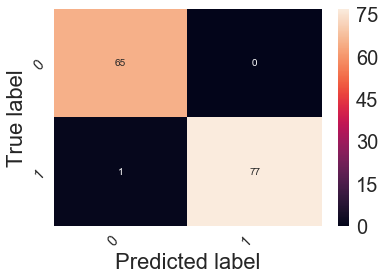

In [268]:
plot_conf_matrix(confusion_matrix(preds,y_test))

In [269]:
method_ensemble.append('MVE')

In [270]:
acc_ensemble.append(accuracy_score(preds,y_test))

In [271]:
roc_ensemble.append(roc_auc_score(preds,y_test))

In [272]:
f1_ensemble.append(f1_score(preds,y_test))

# WAE

In [273]:
start_time = timeit.default_timer()

sum = 0
for acc in training_acc:
    sum = sum + acc

training_acc = training_acc/sum

final_predictions = []
for row_number in range(len(predictions_prob)):
    sum = 0
    for i in range(predictions_prob[0, ].shape[1]):
        sum = sum + (predictions_prob[row_number, ][0,i] * training_acc[i])
    final_predictions.append(sum)

preds = []
THRESHOLD = 0.7
for i in final_predictions:
    if i > THRESHOLD:
        preds.append(1)
    else:
        preds.append(0) 
        
wae_time = training_time + (timeit.default_timer() - start_time)

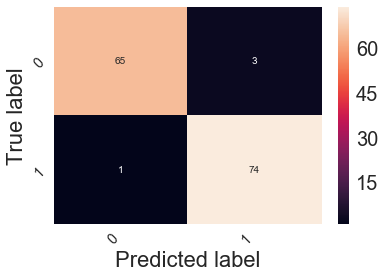

In [274]:
plot_conf_matrix(confusion_matrix(preds,y_test))

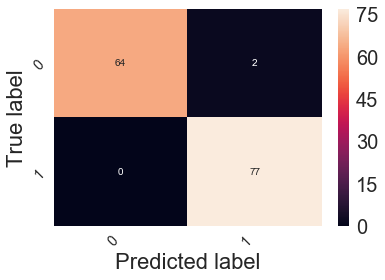

In [275]:
plot_conf_matrix(conf_matrix_boosting)

In [276]:
method_ensemble.append('WAE')

In [277]:
acc_ensemble.append(accuracy_score(preds,y_test))

In [278]:
roc_ensemble.append(roc_auc_score(preds,y_test))

In [279]:
f1_ensemble.append(f1_score(preds,y_test))

# Bagging Classifier Tree (BCT)

In [280]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [281]:
start_time = timeit.default_timer()
clf_bg = BaggingClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=200)
clf_bg.fit(X_train_std,y_train)

bct_time = timeit.default_timer() - start_time

In [282]:
y_pred = clf_bg.predict(X_test_std)

In [283]:
method_ensemble.append('BCT')

In [284]:
acc_ensemble.append(accuracy_score(y_test, y_pred))

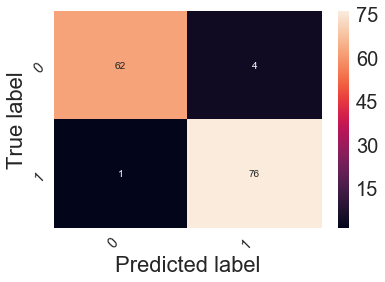

In [285]:
from sklearn.metrics import confusion_matrix
conf_matrix_bct = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)

plot_conf_matrix(conf_matrix_bct)

In [286]:
roc_ensemble.append(roc_auc_score(preds,y_test))

In [287]:
f1_ensemble.append(f1_score(preds,y_test))

# Adaboost classifier

In [288]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

start_time = timeit.default_timer()
clf_ad = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state=1)
clf_ad.fit(X_train_std,y_train)

adaboost_time = timeit.default_timer() - start_time

In [289]:
# Making Predictions
boosting_pred = clf_ad.predict(X_test_std)

In [290]:
method_ensemble.append('Adaboost')

In [291]:
#from sklearn.metrics import accuracy_score
acc_ensemble.append(accuracy_score(y_test, boosting_pred))

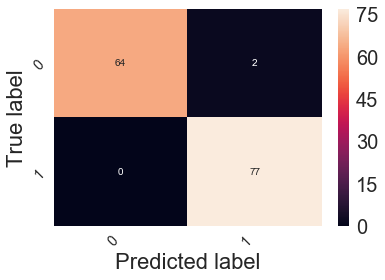

In [292]:
from sklearn.metrics import confusion_matrix
conf_matrix_boosting = confusion_matrix(y_test, boosting_pred, labels=None, sample_weight=None)
plot_conf_matrix(conf_matrix_boosting)

In [293]:
roc_ensemble.append(roc_auc_score(preds,y_test))

In [294]:
f1_ensemble.append(f1_score(preds,y_test))

# WAUCE

In [295]:
start_time = timeit.default_timer()
sum = 0
for score in roc_score:
    sum = sum + score

roc_score = roc_score/sum

final_predictions = []
for row_number in range(len(predictions_prob)):
    sum = 0
    for i in range(predictions_prob[0, ].shape[1]):
        sum = sum + (predictions_prob[row_number, ][0,i] * roc_score[i])
    final_predictions.append(sum)

preds = []
THRESHOLD = 0.7
for i in final_predictions:
    if i > THRESHOLD:
        preds.append(1)
    else:
        preds.append(0) 
        
wauce_time = training_time + (timeit.default_timer() - start_time)

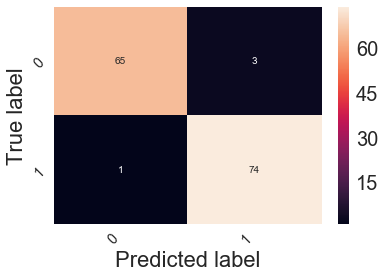

In [296]:
plot_conf_matrix(confusion_matrix(preds,y_test))

In [297]:
method_ensemble.append('WAUCE')

In [298]:
acc_ensemble.append(accuracy_score(preds,y_test))

In [299]:
roc_ensemble.append(roc_auc_score(preds,y_test))

In [300]:
f1_ensemble.append(f1_score(preds,y_test))

In [301]:
# Creating Dict to capture the time taken by different ensemble methods 

time = dict((name,eval(name)) for name in ['maxe_time','mine_time','mve_time','wae_time',
                                           'bct_time','adaboost_time','wauce_time'])

In [302]:
# Sorting the list and displaying the time taken in sorted order

sorted(time.items(), key=lambda x: x[1])

[('bct_time', 1.1522559262548384),
 ('adaboost_time', 2.0264035170480383),
 ('maxe_time', 6.838081824178516),
 ('mine_time', 6.840228069670047),
 ('mve_time', 6.844308975664262),
 ('wauce_time', 6.844782278652019),
 ('wae_time', 6.846087315914247)]

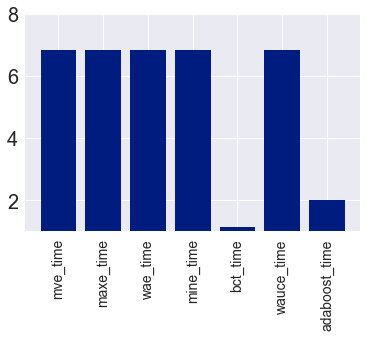

In [314]:
#Visualizing the dataset of time consumed 

names = list(time.keys())
values = list(time.values())

plt.bar(range(len(time)),values,tick_label=names)
plt.xticks(fontsize=14, rotation=90)
plt.ylim(1, 8)
plt.show()

In [304]:
acc_ensemble[0:-2]

[0.965034965034965,
 0.958041958041958,
 0.993006993006993,
 0.972027972027972,
 0.965034965034965]

In [305]:
method_ensemble

['MaxE', 'MinE', 'MVE', 'WAE', 'BCT', 'Adaboost', 'WAUCE']

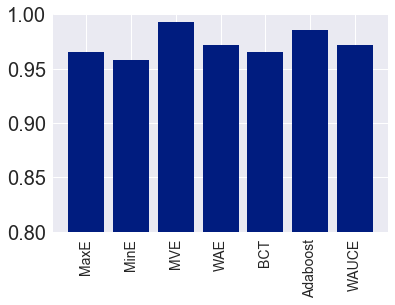

In [317]:
plt.bar(method_ensemble,acc_ensemble,tick_label=method_ensemble)
plt.xticks(fontsize=14, rotation=90)
plt.ylim(0.8, 1)
plt.show()

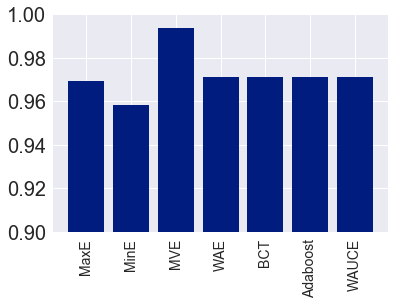

In [307]:
plt.bar(method_ensemble,roc_ensemble,tick_label=method_ensemble)
plt.xticks(fontsize=14, rotation=90)
plt.ylim(0.9, 1)
plt.show()

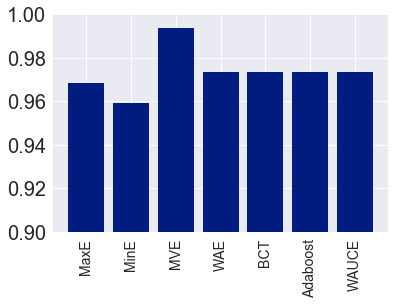

In [308]:
plt.bar(method_ensemble,f1_ensemble,tick_label=method_ensemble)
plt.xticks(fontsize=14, rotation=90)
plt.ylim(0.9, 1)
plt.show()